In [ ]:
!apt-get update-

E: Invalid operation update-


In [ ]:

!apt-get install g++ openjdk-8-jdk

Reading package lists... Done
Building dependency tree       
Reading state information... Done
g++ is already the newest version (4:7.4.0-1ubuntu2.3).
openjdk-8-jdk is already the newest version (8u292-b10-0ubuntu1~18.04).
0 upgraded, 0 newly installed, 0 to remove and 81 not upgraded.


In [ ]:
!pip install konlpy JPype1-py3

In [ ]:

!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

mecab-ko is already installed
mecab-ko-dic is already installed
mecab-python is already installed
Done.


In [ ]:
from konlpy.tag import Mecab

In [ ]:
tokenizer = Mecab()

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import konlpy
import pandas as pd
import numpy as np

In [ ]:
df_train = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/ratings_train.txt',delimiter = '\t',keep_default_na=False)

In [ ]:
df_train[:3]

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0


In [ ]:
from konlpy.tag import Mecab

In [ ]:
tokenizer = Mecab()
def mecab_tokenizer(text):
  return tokenizer.morphs(text)

In [ ]:

string_test = "아버지가 방에 들어가신다"

In [ ]:
tokenizer.morphs(string_test)

['아버지', '가', '방', '에', '들어가', '신다']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf = TfidfVectorizer(tokenizer=mecab_tokenizer,ngram_range=(1,2), min_df=3,max_df = 0.9)

In [ ]:
tfidf.fit(df_train['document'])

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.9, max_features=None,
                min_df=3, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=<function mecab_tokenizer at 0x7f6f3c25a9e0>,
                use_idf=True, vocabulary=None)

In [ ]:
df_train_tfidf = tfidf.transform(df_train['document'])

In [ ]:
from sklearn.svm import LinearSVC
svm = LinearSVC()
svm.fit(df_train_tfidf,df_train['label'])
svm.score(df_train_tfidf, df_train["label"])

0.9693533333333333

In [ ]:
df_test = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/ratings_test.txt', delimiter='\t', keep_default_na=False)

In [ ]:
df_test_tfidf = tfidf.transform(df_test['document'])

In [ ]:
test_pred = svm.predict(df_test_tfidf)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(df_test['label'],test_pred)

0.86794

In [ ]:
s1=input('너의 말은?:')

너의 말은?:배불러


In [ ]:

import re

In [ ]:
s1 = re.compile(r'[ㄱ-ㅣ가-힣]+').findall(s1)

In [ ]:
print(s1)

배불러


In [ ]:
s1 = [" ".join(s1)]

In [ ]:
print(s1)

['배불러']


In [ ]:
s1_tfidf = tfidf.transform(s1)

In [ ]:
s1_pred = svm.predict(s1_tfidf)

In [ ]:
if(s1_pred==0):
  print("저런.. 기분이 안좋구나")
else:
  print("기분이 좋구나?^^")

저런.. 기분이 안좋구나


In [ ]:
import json
with open('/content/gdrive/My Drive/Colab Notebooks/news.json') as j_f:
  data = json.load(j_f)

In [ ]:
data_title = []
data_description = []
for item in data:
  data_title.append(item['title'])
  data_description.append(item['description'])

In [ ]:
data_df = pd.DataFrame({'title':data_title,'description':data_description})

In [ ]:
data_df['title'] = data_df['title'].apply(lambda x: re.sub(r'[^ ㄱ-ㅣ가-힣]+'," ",x))
data_df['description'] = data_df['description'].apply(lambda x: re.sub(r'[^ ㄱ-ㅣ가-힣]+'," ",x))

In [ ]:
data_df[:10]

,title,description
0,결국 증세론 먼저 꺼내든 증세없는 기본소득 불가능,코로나 발 경제 위기 대응을 위해 돈 쓸 곳은 늘어났지만 국세 수입은 줄어들면서...
1,창녕군 창녕형 비대면 선별진료소 운영,지난 일 창녕군보건소 앞에 설치한 선별진료소에서 검사자가 체온을 측정하고 있다...
2,모바일 메인 홍보 모델로 설현 선정,한편 설현 은 최근 코로나 바이러스를 다룬 시리즈 세계적 유행 에...
3,김병민 기본소득도 필요하면 논의 테이블에 올려야 인터뷰,변화의 핵심 중에서는 우리 사회가 신종 코로나 바이러스 감염증 코로나 의 위기를 ...
4,이재갑 장관 고용안정지원금 서울센터 방문,이재갑 고용노동부 장관은 월 일 수 시에 코로나 긴급 고용안정지원금 서울 센터 서...
5,부산행 반도 로 이어지는 한국형 좀비 세계관 칸의 선택 받았다,하지만 올해 신종 코로나 바이러스 감염증 코로나 여파로 오프라인 행사를 진행하지...
6,년만 첫 불허 에도 홍콩 톈안문 추모 촛불,경찰은 코로나 감염이 우려된다며 명 이상을 모이는 집회를 봉쇄해왔고 지난 홍콩...
7,국내 대 항만 월 물동량 인천항만 상승곡선,전국 컨테이너 처리량 만 국내 항만은 월 들어 신종 코로나 바이러스 감염증 ...
8,경기도의회 농정해양위 농민기본소득 도입 이재명 지사와 집행부에 강력 촉구,한편 코로나 로 인한 해외의 식재료 사재기에서 보듯이 국민들의 먹거리를 안정적으...
9,이용빈 원내부대표 코로나 대응 의료진 노동자 건강권 보장해야,이용빈 의원실 제공 이용빈 민주당 원내부대표가 일 코로나 상시화 장기화에 따...


In [ ]:
data_title_tfidf = tfidf.transform(data_df['title'])

In [ ]:
data_title_pred = svm.predict(data_title_tfidf)

In [ ]:
data_df['title_label']= data_title_pred

In [ ]:

data_df

,title,description,title_label
0,결국 증세론 먼저 꺼내든 증세없는 기본소득 불가능,코로나 발 경제 위기 대응을 위해 돈 쓸 곳은 늘어났지만 국세 수입은 줄어들면서...,0
1,창녕군 창녕형 비대면 선별진료소 운영,지난 일 창녕군보건소 앞에 설치한 선별진료소에서 검사자가 체온을 측정하고 있다...,1
2,모바일 메인 홍보 모델로 설현 선정,한편 설현 은 최근 코로나 바이러스를 다룬 시리즈 세계적 유행 에...,1
3,김병민 기본소득도 필요하면 논의 테이블에 올려야 인터뷰,변화의 핵심 중에서는 우리 사회가 신종 코로나 바이러스 감염증 코로나 의 위기를 ...,1
4,이재갑 장관 고용안정지원금 서울센터 방문,이재갑 고용노동부 장관은 월 일 수 시에 코로나 긴급 고용안정지원금 서울 센터 서...,0
...,...,...,...
795,세계의 눈 코로나 영향 현대차 매출 큰 타격 하지만 차량은 순항,글로벌기업 현대 기아차가 코로나 의 여파로 해외시장에서 고전을 면치 못하고 있는 ...,1
796,중부발전 소규모 태양광사업자 판매대금 선 지급,한국중부발전 본사 전경 한국중부발전 사장 박형구 은 코로나 장기화로 인해 경제적...,1
797,코로나 함께 극복 박종환 자유총연맹 총재 캠페인 참여,박종환 한국자유총연맹 총재 신종 코로나 바이러스 감염증 코로나 극복과 조기 종식...,1
798,치과의사 명 모이는 행사 앞두고 치협 회장 행사 취소해달라,이상훈 회장은 코로나 신규 확진자가 수도권에서 발생했고 정부는 수도권 한정 사...,0


In [ ]:
data_description_tfidf = tfidf.transform(data_df['description'])

In [ ]:
data_description_pred = svm.predict(data_description_tfidf)

In [ ]:
data_df['description_label']= data_description_pred

In [ ]:
data_df.to_csv("/content/gdrive/My Drive/Colab Notebooks/news.csv",encoding="euc-kr")

In [ ]:
data_df[:5]

,title,description,title_label,description_label
0,결국 증세론 먼저 꺼내든 증세없는 기본소득 불가능,코로나 발 경제 위기 대응을 위해 돈 쓸 곳은 늘어났지만 국세 수입은 줄어들면서...,0,0
1,창녕군 창녕형 비대면 선별진료소 운영,지난 일 창녕군보건소 앞에 설치한 선별진료소에서 검사자가 체온을 측정하고 있다...,1,0
2,모바일 메인 홍보 모델로 설현 선정,한편 설현 은 최근 코로나 바이러스를 다룬 시리즈 세계적 유행 에...,1,1
3,김병민 기본소득도 필요하면 논의 테이블에 올려야 인터뷰,변화의 핵심 중에서는 우리 사회가 신종 코로나 바이러스 감염증 코로나 의 위기를 ...,1,1
4,이재갑 장관 고용안정지원금 서울센터 방문,이재갑 고용노동부 장관은 월 일 수 시에 코로나 긴급 고용안정지원금 서울 센터 서...,0,0


In [ ]:
data_df['title_label'].value_counts()

0    478
1    322
Name: title_label, dtype: int64

In [ ]:
data_df['description_label'].value_counts()

0    449
1    351
Name: description_label, dtype: int64

In [ ]:

columns_name = ['title','title_label','description','description_label']
NEG_data_df = pd.DataFrame(columns = columns_name)
POS_data_df = pd.DataFrame(columns = columns_name)

for i, data in data_df.iterrows():
  title = data["title"]
  description = data["description"]
  t_label = data["title_label"]
  d_label = data["description_label"]

  data= [[title, t_label, description, d_label]]
  if d_label == 0:
    NEG_data_df = NEG_data_df.append(pd.DataFrame(data, columns=columns_name),
                                     ignore_index=True)
  else:
    POS_data_df = POS_data_df.append(pd.DataFrame(data, columns= columns_name),ignore_index=True)

,title,title_label,description,description_label


In [ ]:
NEG_data_df.to_csv('/content/gdrive/My Drive/Colab Notebooks/news_NEG.csv',encoding="euc-kr")

In [ ]:
POS_data_df.to_csv('/content/gdrive/My Drive/Colab Notebooks/news_POS.csv',encoding="euc-kr")

In [ ]:
POS_description = POS_data_df['description']

In [ ]:
POS_description = POS_data_df['description']

In [ ]:
POS_description_noun_tk = []
for d in POS_description:
  POS_description_noun_tk.append(tokenizer.nouns(d))
POS_description = POS_description_noun_join = []
for d in POS_description_noun_tk:
  d2 = [w for w in d if len(w)>1]
  POS_description_noun_join.append(" ".join(d2))
POS_description_noun_join

['한편 설현 최근 코로나 바이러스 시리즈 세계 유행 다큐멘터리 내레이션 처음 도전 호평 드라마 출연 검토 게임 이벤트',
 '변화 핵심 우리 사회 신종 코로나 바이러스 감염증 코로나 위기 미래 모른다 국가 국민 어려움 해결 저희',
 '올해 신종 코로나 바이러스 감염증 코로나 여파 오프라인 행사 진행 공식 채널 명칭 청작 리스트 공개 한편 국내외',
 '한편 코로나 해외 재료 사재기 국민 먹거리 안정 생산 포스트 코로나 주요 과제 부각 농민 기본소득 도입 안정 생산 기반 확충',
 '코로나 사태 지속 의대 강의 대부분 대면 실습 강의실 풍경 예전 코로나 대부분 학과 수업',
 '최근 갤러리 현대 창업 주년 기념 작품 전시 코로나 영향 마스크 착용 관람객 미술 트렌드 한국 미술 시장 정태희 서울 옥션 스페셜 리스트 세계 경기 침체 코로나 여파',
 '세계 코로나 전례 위기 국내외 영화 예상 타격 부산 국제 영화제 국내외 상황 인지 예의 주시 정부 방침 권고',
 '코로나 감안 면접 역량 검사 도입 국내 최대 치킨 프랜차이즈 제너 시스 비비 회장 채용 관계자 한국 대표 책임 브랜드 코로나 침체 채용 분위기',
 '오후 서울 중랑구 서울 의료 서울 의료 콘서트 신종 코로나 바이러스 감염증 코로나 환자 진료 수고 의료진 가수 공연 뉴스',
 '플립 러닝 온라인 학습 교실 토론 심화 학습 교실 포스트 코로나 시대 교육 방식 주목 아르고 리더 상황 게임 리더십 유형',
 '코로나 사태 가운데 병영 생활 손흥민 경험 영국 화제 손흥민 호흡',
 '청와대 해외 낭보 문재인 대통령 포스트 코로나 시대 경제 위기 정상 회담 양국 협력 에너지 의료 확장 최근 카타르 코로나 관련',
 '정하영 김포 시장 혁신 교육 지구 사업 특수 교육 대상자 사업 별도 편성 소외 학생 코로나 교육 과정 운영 판단 학생 안전 방역',
 '군포 시청 서울시 리치 웨이 코로나 확진 동선 공개 군포 거주 자료 군포 시청 군포 시청 서울시 리치 웨이 코로나 확진 동선 공개 군포 시청 공식 블로그 서울시'

In [ ]:
NEG_description_noun_tk = []
for d in NEG_description:
  NEG_description_noun_tk.append(tokenizer.nouns(d))
NEG_description = NEG_description_noun_join = []
for d in POS_description_noun_tk:
  d2 = [w for w in d if len(w)>1]
  NEG_description_noun_join.append(" ".join(d2))
NEG_description_noun_join

['한편 설현 최근 코로나 바이러스 시리즈 세계 유행 다큐멘터리 내레이션 처음 도전 호평 드라마 출연 검토 게임 이벤트',
 '변화 핵심 우리 사회 신종 코로나 바이러스 감염증 코로나 위기 미래 모른다 국가 국민 어려움 해결 저희',
 '올해 신종 코로나 바이러스 감염증 코로나 여파 오프라인 행사 진행 공식 채널 명칭 청작 리스트 공개 한편 국내외',
 '한편 코로나 해외 재료 사재기 국민 먹거리 안정 생산 포스트 코로나 주요 과제 부각 농민 기본소득 도입 안정 생산 기반 확충',
 '코로나 사태 지속 의대 강의 대부분 대면 실습 강의실 풍경 예전 코로나 대부분 학과 수업',
 '최근 갤러리 현대 창업 주년 기념 작품 전시 코로나 영향 마스크 착용 관람객 미술 트렌드 한국 미술 시장 정태희 서울 옥션 스페셜 리스트 세계 경기 침체 코로나 여파',
 '세계 코로나 전례 위기 국내외 영화 예상 타격 부산 국제 영화제 국내외 상황 인지 예의 주시 정부 방침 권고',
 '코로나 감안 면접 역량 검사 도입 국내 최대 치킨 프랜차이즈 제너 시스 비비 회장 채용 관계자 한국 대표 책임 브랜드 코로나 침체 채용 분위기',
 '오후 서울 중랑구 서울 의료 서울 의료 콘서트 신종 코로나 바이러스 감염증 코로나 환자 진료 수고 의료진 가수 공연 뉴스',
 '플립 러닝 온라인 학습 교실 토론 심화 학습 교실 포스트 코로나 시대 교육 방식 주목 아르고 리더 상황 게임 리더십 유형',
 '코로나 사태 가운데 병영 생활 손흥민 경험 영국 화제 손흥민 호흡',
 '청와대 해외 낭보 문재인 대통령 포스트 코로나 시대 경제 위기 정상 회담 양국 협력 에너지 의료 확장 최근 카타르 코로나 관련',
 '정하영 김포 시장 혁신 교육 지구 사업 특수 교육 대상자 사업 별도 편성 소외 학생 코로나 교육 과정 운영 판단 학생 안전 방역',
 '군포 시청 서울시 리치 웨이 코로나 확진 동선 공개 군포 거주 자료 군포 시청 군포 시청 서울시 리치 웨이 코로나 확진 동선 공개 군포 시청 공식 블로그 서울시'

In [ ]:
NEG_description = NEG_data_df['description']

NEG_description_noun_tk = []
NEG_description_noun_join = []

for d in NEG_description:
  NEG_description_noun_tk.append(tokenizer.nouns(d))

for d in NEG_description_noun_tk:
  d2 = [w for w in d if len(w)>1]
  NEG_description_noun_join.append(" ".join(d2))

In [ ]:
POS_tfidf = TfidfVectorizer(tokenizer = mecab_tokenizer, min_df = 2)
POS_dtm = POS_tfidf.fit_transform(POS_description_noun_join)

In [ ]:
POS_vocab = dict()

for idx, word in enumerate(POS_tfidf.get_feature_names()):
  POS_vocab[word]=POS_dtm.getcol(idx).sum()

POS_words = sorted(POS_vocab.items(), key = lambda x:x[1],reverse=True)

In [ ]:
NEG_tfidf = TfidfVectorizer(tokenizer = mecab_tokenizer,min_df =2)
NEG_dtm = NEG_tfidf.fit_transform(NEG_description_noun_join)

In [ ]:
NEG_vocab = dict()

for idx, word in enumerate(NEG_tfidf.get_feature_names()):
  NEG_vocab[word] = NEG_dtm.getcol(idx).sum()

NEG_words = sorted(NEG_vocab.items(), key = lambda x:x[1], reverse = True)


In [ ]:
description = data_df['description']

In [ ]:
description_noun_tk =  []

for d in description:
  description_noun_tk.append(tokenizer.nouns(d)) 

In [ ]:
description_noun_tk2 =  []

for d in description_noun_tk:
  item = [i for i in d if len(i)>1]
  description_noun_tk2.append(item)

In [ ]:
!pip install gensim

In [ ]:
import gensim
import gensim.corpora as corpora

In [ ]:
dictionary = corpora.Dictionary(description_noun_tk2)

In [ ]:
corpus = [dictionary.doc2bow(word) for word in description_noun_tk2] 

In [ ]:
k = 4

In [ ]:
lda_model = gensim.models.ldamulticore.LdaMulticore(corpus, iterations = 12, num_topics= k, id2word = dictionary, passes = 1 , workers = 10)

In [ ]:
!pip install pyLDAvis

In [ ]:
import os
os.environ["PYTHONIOPENCODING"] = "utf-8"

import pyLDAvis.gensim
lda_vis = pyLDAvis.gensim.prepare(lda_model,corpus, dictionary)

ModuleNotFoundError: ignored

In [ ]:
!sudo apt-get install -y fonts-nanum

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 81 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,395 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 161633 files and d

In [ ]:
!sudo fc-cache -fv

/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 4 dirs
/usr/share/fonts/truetype/dejavu: caching, new cache contents: 22 fonts, 0 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
!rm ~/.cache/matplotlib -rf

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
from collections import Counter
from matplotlib import font_manager, rc
from wordcloud import WordCloud

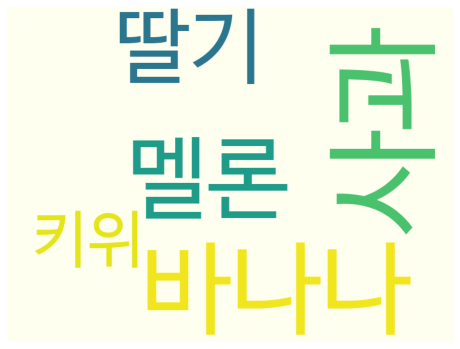

In [ ]:
dict1 = {'딸기':10,'사과':20,"바나나":15,"키위":5,"멜론":12}
path = 'user/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
wc = WordCloud(font_path = path, background_color = 'ivory', width = 800, height = 600)
cloud = wc.generate_from_frequencies(dict1)
plt.figure(figsize = (8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

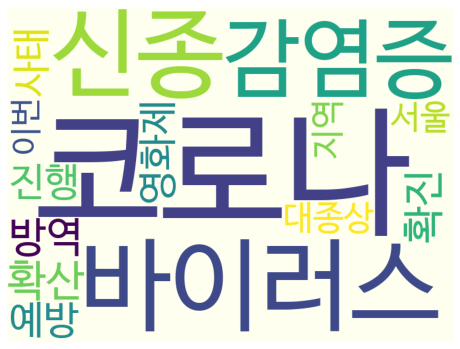

In [195]:
NEG_words_fixed = dict(NEG_words[:15])
path = 'user/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
wc = WordCloud(font_path = path, background_color = 'ivory', width = 800, height = 600)
cloud = wc.generate_from_frequencies(NEG_words_fixed)
plt.figure(figsize = (8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

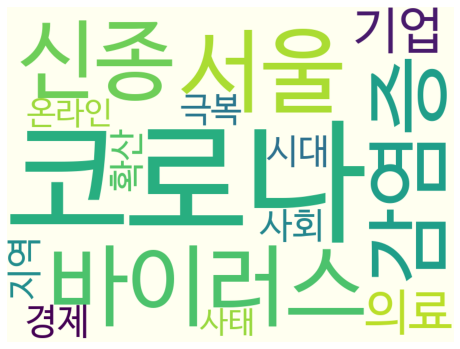

In [196]:
POS_words_fixed = dict(POS_words[:15])
path = 'user/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
wc = WordCloud(font_path = path, background_color = 'ivory', width = 800, height = 600)
cloud = wc.generate_from_frequencies(POS_words_fixed)
plt.figure(figsize = (8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()